In [1]:
%pylab ipympl 

import multizone_plot as mzp
from multizone import mppnp_reader

Populating the interactive namespace from numpy and matplotlib


In [2]:
mixing_cases = []

for case in ["MLT", "PPM", "PPM3", "PPM10", "PPM50"]:
    for ing in ["0.00E+00","7.95E+01","7.95E+02","7.95E+03"]:
        res = mppnp_reader(initialpath = "/data/niagara_project/projects/ocmerger_issa2025/CONDITIONS/initial_abund.dat",
                           surfpath = f"/data/niagara_project/projects/ocmerger_issa2025/RUNS/{case}_RUNS/hif{ing}/H5_surf",)
        
        mixing_cases.append(res)
    
for ing in ["gosh", "gosh_stronger", "partial_merger", "partial_merger_stronger"]:
    res = mppnp_reader(initialpath = "/data/niagara_project/projects/ocmerger_issa2025/CONDITIONS/initial_abund.dat",
                       surfpath = f"/data/niagara_project/projects/ocmerger_issa2025/RUNS/GOSH_RUNS/{ing}/H5_surf",)
    mixing_cases.append(res)

In [13]:
def bar_OP(ifig, objs, isotopes, cycle):
    '''Plot the mass fractions against the solar mass fractions.
    INPUTS:
        objs - the mppnp object you want to plot
        isotopes - the isotopes you want to plot
        cycle - the cycle you want to plot for
        label - the label for the data
        lines - true/False, whether to connect isotopes with the same Z with a line (use with separated = False)
        separated - True/False, whether to plot the isotopes separate from each other.
                  If True, shows shaded bands of max/min values instead of individual points.
    '''
    
    plt.close(ifig); plt.figure(ifig, figsize=(15,6))
    
    if not isinstance(objs, list): objs = [objs]
    
    jmax = len(objs) - 1
    ymin_glo, ymax_glo = 0, 0

    xpos = np.linspace(1, len(isotopes), len(isotopes))
    all_Xi_Xsol = []

    # Collect data and display averages
    for j, obj in enumerate(objs):
        Xi_surf = obj.get('surf', cycle, isotopes)
        Xi_solar = obj.get('initial', np.nan, isotopes)
        Xi_Xsol = np.log10(Xi_surf/Xi_solar)
        all_Xi_Xsol.append(Xi_Xsol)


    # Process data for shaded regions
    all_Xi_Xsol = np.array(all_Xi_Xsol)
    min_Xi_Xsol = np.min(all_Xi_Xsol, axis=0)
    max_Xi_Xsol = np.max(all_Xi_Xsol, axis=0)

    # Create individual shaded regions
    for i in range(len(isotopes)):
        x_points = [xpos[i] - 0.4, xpos[i] + 0.4]
        y_min = [min_Xi_Xsol[i], min_Xi_Xsol[i]]
        y_max = [max_Xi_Xsol[i], max_Xi_Xsol[i]]

        plt.fill_between(x_points, y_min, y_max, alpha=0.3, color='darkmagenta', edgecolor=None,zorder=5)
        plt.plot(x_points, y_min, 'darkmagenta', linewidth=1.5,zorder=5)
        plt.plot(x_points, y_max, 'darkmagenta', linewidth=1.5,zorder=5)
        
        print(isotopes[i], round(y_max[0] - y_min[0],2))
        
    # Set labels and limits
    plt.ylabel(r'$\mathrm{OP}=\log_{10}(X_i / X_{i,\mathrm{ini}})$', fontsize=14)

    ymin, ymax = min(min_Xi_Xsol), max(max_Xi_Xsol)
    ymin, ymax = objs[0].round_to_nearest(np.array([ymin, ymax]), 0.5)
    xmin, xmax = -0.5, len(isotopes)+1

    # Finalize plot
    ax = plt.gca()
    ax = mzp.plot_ticks(ax, ymin, ymax, xmin, xmax, 0.25, 0.5, noxlabel=True)
    ax.tick_params(axis='y', labelsize=14)
    
    ymin, ymax = ax.get_ylim()
    
    # Add isotope labels
    yshift = 0.3
    for idx, isotope in enumerate(isotopes, 1):

        ele, A = isotope.split('-')
        iso = fr'$^{{{A}}}\mathrm{{{ele}}}$'

        text_y = ymax-yshift*1.2 if idx % 2 == 1 else ymin+yshift*0.4
        if idx%2 == 1: plt.axvline(idx, color='lightgrey', lw=0.5,zorder=1)
        
        plt.text(idx-0.1, text_y, iso, ha='center', fontsize=14)
    
    if 0 < ymax and 0 > ymin: plt.axhline(0, color='grey', lw=3, zorder=1)

    plt.tight_layout()

In [4]:
lightoddZ = ['P-31', 'Cl-35', 'Cl-37', 'K-39', 'K-40', 'K-41', 'Sc-45']

P-31 0.58
Cl-35 1.76
Cl-37 0.81
K-39 2.42
K-40 3.37
K-41 2.13
Sc-45 1.68


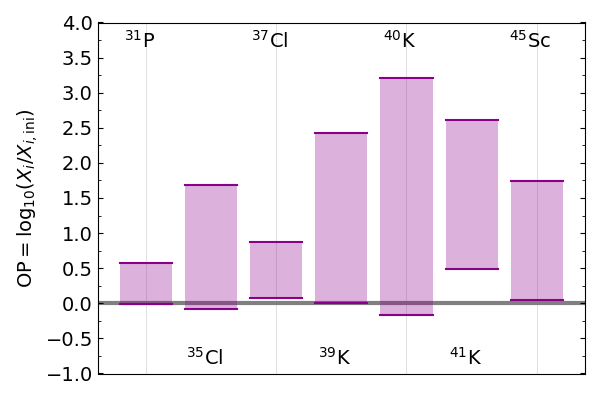

In [8]:
bar_OP(1,mixing_cases, lightoddZ, 11000)

plt.savefig("../figures/lightoddZ_barplot.pdf")

In [6]:
OPs = [0.58,1.76,0.81,2.42,3.37, 2.13, 1.68]

np.average(OPs)

1.8214285714285714

In [15]:
stable_isotopes = [
    "C-12", "C-13",
    "N-14", "N-15",
    "O-16", "O-17", "O-18",
    "F-19",
    "Ne-20", "Ne-21", "Ne-22",
    "Na-23",
    "Mg-24", "Mg-25", "Mg-26",
    "Al-27",
    "Si-28", "Si-29", "Si-30",
    "P-31",
    "S-32", "S-33", "S-34", "S-36",
    "Cl-35", "Cl-37",
    "Ar-36", "Ar-38", "Ar-40",
    "K-39", "K-40", "K-41",
    "Ca-40", "Ca-42", "Ca-43", "Ca-44", "Ca-46", "Ca-48",
    "Sc-45",
    "Ti-46", "Ti-47", "Ti-48", "Ti-49", "Ti-50",
    "V-51",
    "Cr-50", "Cr-52", "Cr-53", "Cr-54",
    "Mn-55"
]

C-12 2.94
C-13 3.35
N-14 4.57
N-15 3.58
O-16 0.55
O-17 4.02
O-18 7.38
F-19 8.56
Ne-20 5.43
Ne-21 6.76
Ne-22 4.71
Na-23 4.66
Mg-24 0.23
Mg-25 3.1
Mg-26 2.5
Al-27 1.32
Si-28 0.44
Si-29 0.65
Si-30 1.53
P-31 0.58
S-32 0.72
S-33 0.46
S-34 0.36
S-36 1.56
Cl-35 1.76
Cl-37 0.81
Ar-36 1.81
Ar-38 0.53
Ar-40 1.76
K-39 2.42
K-40 3.37
K-41 2.13
Ca-40 2.2
Ca-42 1.82
Ca-43 2.35
Ca-44 0.5
Ca-46 1.53
Ca-48 5.32
Sc-45 1.68
Ti-46 2.18
Ti-47 1.98
Ti-48 0.38
Ti-49 1.3
Ti-50 0.77
V-51 0.87
Cr-50 2.25
Cr-52 0.4
Cr-53 1.11
Cr-54 1.27
Mn-55 0.23


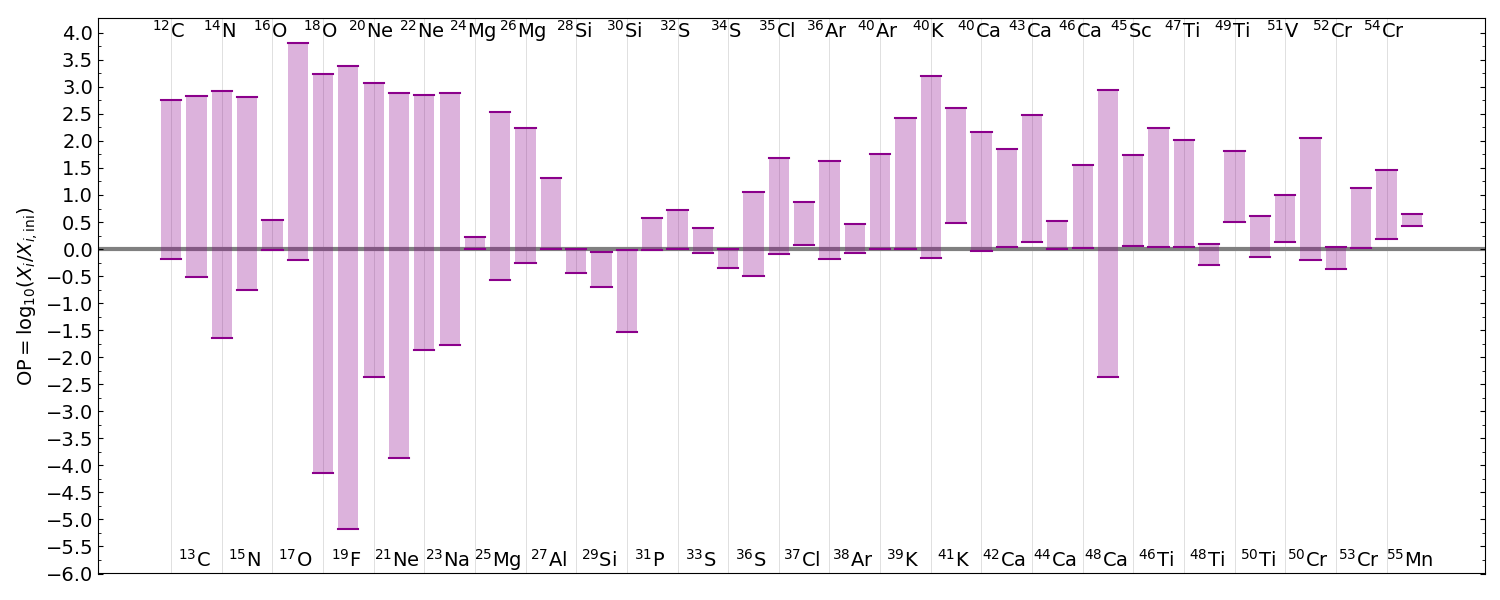

In [17]:
bar_OP(1,mixing_cases, stable_isotopes, 11000)